# IMPORT NECESSARY DEPENDENCIES

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [24]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud #wordcloud: the size of each word indicates its frequency or importance
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Read and Load the Dataset

In [52]:
DATASET_ENCODING = "ISO-8859-1"
tweet_df = pd.read_csv('Twitter-Tweet-Retailers.csv', encoding=DATASET_ENCODING)
tweet_df

,TimeStamp,Tweet Id,Name,Tweet,LIke,ReplyCount,COMPANY NAME
0,2021-12-30 11:08:33+00:00,1476510512959553538,JioMart_Support,"@rehaan_321 Hi Rehaan, We request you to delet...",0,0,JIOMART
1,2021-12-30 10:27:28+00:00,1476500175149355008,BezadSukheswala,@JioMart_Support You informed me in one of you...,0,1,JIOMART
2,2021-12-30 06:18:40+00:00,1476437563770499073,JioMart_Support,"@YogeshV53603769 Hi Yogesh, We request you to ...",0,0,JIOMART
3,2021-12-29 14:02:12+00:00,1476191827820564485,DrNawafVazir,@JioMart_Support I'm ok with my personal detai...,0,0,JIOMART
4,2021-12-29 12:24:37+00:00,1476167268992049153,JioMart_Support,"@DrNawafVazir Hi, We understand your concern. ...",0,1,JIOMART
...,...,...,...,...,...,...,...
30001,2021-11-07 05:38:24+00:00,1457220871970381825,Rajeshsingh_DBA,@Snapdeal_Help I had heard many times these co...,0,0,SNAPDEAL
30002,2021-11-07 05:25:01+00:00,1457217502799269896,Nitesh_05,"@voldermort891 @Snapdeal_Help Yes, it's noted ...",0,1,SNAPDEAL
30003,2021-11-07 05:23:40+00:00,1457217166332207104,Nitesh_05,@Snapdeal_Help This is really a worst experien...,0,0,SNAPDEAL
30004,2021-11-07 04:59:43+00:00,1457211137469071362,k_klps,@SnapdealGujarat @snapdeal Please write proper...,0,0,SNAPDEAL


In [53]:
# Five top records of data
tweet_df.head()

,TimeStamp,Tweet Id,Name,Tweet,LIke,ReplyCount,COMPANY NAME
0,2021-12-30 11:08:33+00:00,1476510512959553538,JioMart_Support,"@rehaan_321 Hi Rehaan, We request you to delet...",0,0,JIOMART
1,2021-12-30 10:27:28+00:00,1476500175149355008,BezadSukheswala,@JioMart_Support You informed me in one of you...,0,1,JIOMART
2,2021-12-30 06:18:40+00:00,1476437563770499073,JioMart_Support,"@YogeshV53603769 Hi Yogesh, We request you to ...",0,0,JIOMART
3,2021-12-29 14:02:12+00:00,1476191827820564485,DrNawafVazir,@JioMart_Support I'm ok with my personal detai...,0,0,JIOMART
4,2021-12-29 12:24:37+00:00,1476167268992049153,JioMart_Support,"@DrNawafVazir Hi, We understand your concern. ...",0,1,JIOMART


In [54]:
# Columns/features in data
tweet_df.columns

Index(['TimeStamp', 'Tweet Id', 'Name', 'Tweet', 'LIke', 'ReplyCount',
       'COMPANY NAME'],
      dtype='object')

In [55]:
# Length of the dataset
print('Length of data is :', len(tweet_df))

Length of data is : 30006


In [56]:
# Shape of data
tweet_df.shape

(30006, 7)

In [57]:
# Data information
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TimeStamp     30006 non-null  object
 1   Tweet Id      30006 non-null  int64 
 2   Name          30006 non-null  object
 3   Tweet         30006 non-null  object
 4   LIke          30006 non-null  int64 
 5   ReplyCount    30006 non-null  int64 
 6   COMPANY NAME  30006 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [58]:
# Datatypes of all columns
tweet_df.dtypes

TimeStamp       object
Tweet Id         int64
Name            object
Tweet           object
LIke             int64
ReplyCount       int64
COMPANY NAME    object
dtype: object

In [59]:
# Checking for Null values
tweet_df.isnull().sum()

TimeStamp       0
Tweet Id        0
Name            0
Tweet           0
LIke            0
ReplyCount      0
COMPANY NAME    0
dtype: int64

In [60]:
# Taking Company_Name and tweet for Analysis
df_tweet = tweet_df[['COMPANY NAME', 'Tweet']]
df_tweet

,COMPANY NAME,Tweet
0,JIOMART,"@rehaan_321 Hi Rehaan, We request you to delet..."
1,JIOMART,@JioMart_Support You informed me in one of you...
2,JIOMART,"@YogeshV53603769 Hi Yogesh, We request you to ..."
3,JIOMART,@JioMart_Support I'm ok with my personal detai...
4,JIOMART,"@DrNawafVazir Hi, We understand your concern. ..."
...,...,...
30001,SNAPDEAL,@Snapdeal_Help I had heard many times these co...
30002,SNAPDEAL,"@voldermort891 @Snapdeal_Help Yes, it's noted ..."
30003,SNAPDEAL,@Snapdeal_Help This is really a worst experien...
30004,SNAPDEAL,@SnapdealGujarat @snapdeal Please write proper...


In [61]:
# Rows and columns in the dataset
print('Count of columns in the data is:  ', len(tweet_df.columns))
print('Count of rows in the data is:  ', len(tweet_df))

Count of columns in the data is:   7
Count of rows in the data is:   30006


# DATA CLEANING

In [62]:
# removing emojis
import re
def remove_emojis(TWEET):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                  "]+", re.UNICODE)
    return re.sub(emoji, '', TWEET)
df_tweet['Tweet'] = df_tweet['Tweet'].apply(remove_emojis)

<ipython-input-62-dc530254e947>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].apply(remove_emojis)


In [63]:
#cleaning the text(text Preprocessing)
def text_preprocessing(text):

    text = re.sub(r"http\S+", "", text)       # removing the hyperlink 
    text = re.sub(r"www.\S+", "", text)       # removing the hyperlink 
    text= re.sub("@[A-Za-z0-9_]+","", text)   # removing the @user
    text = re.sub("#[A-Za-z0-9_]+","", text)  # removing the #user
    text = re.sub("^\\s+|\\s+$", "", text)    # removing leading and trailing white spaces
    text = re.sub("[^a-zA-Z]", " ", text)     # removing the non alphanumeric words
    text = re.sub(r'(.)1+', r'1', text)       # removing the repeated tweet
    text = re.sub('[0-9]+', '', text)         # removing the numbers
    text = re.sub("\n", " ", text)            # removing the new line
    text = re.sub("[ \t]{2,}", " ", text)     # removing the two blank space
    return text
df_tweet['Tweet'] = df_tweet['Tweet'].apply(text_preprocessing)

<ipython-input-63-d06c487ee96e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].apply(text_preprocessing)


In [64]:
df_tweet.Tweet

0        Hi Rehaan We request you to delete this tweet ...
1        You informed me in one of your tweet few minut...
2        Hi Yogesh We request you to delete this tweet ...
3        I m ok with my personal details being online a...
4        Hi We understand your concern JioMart always e...
                               ...                        
30001    I had heard many times these comments I am not...
30002       Yes it s noted and I ll not get into the trap 
30003    This is really a worst experience for me yeste...
30004    Please write proper pronunciation in gujarati ...
30005    As per above treatment or behavior In future w...
Name: Tweet, Length: 30006, dtype: object

In [65]:
# Removing Punctuations
def text_punctuation(text_pun):
    text_pun = re.sub('[()!?]', ' ', text_pun)
    text_pun = re.sub('\[.*?\]',' ', text_pun)
    return text_pun
df_tweet['Tweet'] = df_tweet['Tweet'].apply(text_punctuation)

<ipython-input-65-2fc8aa5019ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].apply(text_punctuation)


In [66]:
# removing small frequent words
df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

<ipython-input-66-4b766f063deb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [67]:
#Tokenization
def text_tokenization(text_token):
    text_token = text_token.split()
    return text_token
df_tweet['Tweet'] = df_tweet['Tweet'].apply(text_tokenization)

<ipython-input-67-119a32973653>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].apply(text_tokenization)


In [68]:
df_tweet.Tweet

0        [Rehaan, request, you, delete, this, tweet, pr...
1        [You, informed, one, your, tweet, few, minutes...
2        [Yogesh, request, you, delete, this, tweet, pr...
3        [with, personal, details, being, online, long,...
4        [understand, your, concern, JioMart, always, e...
                               ...                        
30001    [had, heard, many, times, these, comments, not...
30002         [Yes, noted, and, not, get, into, the, trap]
30003    [This, really, worst, experience, for, yesterd...
30004    [Please, write, proper, pronunciation, gujarat...
30005    [per, above, treatment, behavior, future, will...
Name: Tweet, Length: 30006, dtype: object

In [69]:
# Stopwords Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')   

# Removing the stopwords
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda text: cleaning_stopwords(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-69-23f58411faca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda text: cleaning_stopwords(text))


In [70]:
df_tweet.Tweet

0        ['Rehaan', 'request', 'you', 'delete', 'this',...
1        ['You', 'informed', 'one', 'your', 'tweet', 'f...
2        ['Yogesh', 'request', 'you', 'delete', 'this',...
3        ['with', 'personal', 'details', 'being', 'onli...
4        ['understand', 'your', 'concern', 'JioMart', '...
                               ...                        
30001    ['had', 'heard', 'many', 'times', 'these', 'co...
30002    ['Yes', 'noted', 'and', 'not', 'get', 'into', ...
30003    ['This', 'really', 'worst', 'experience', 'for...
30004    ['Please', 'write', 'proper', 'pronunciation',...
30005    ['per', 'above', 'treatment', 'behavior', 'fut...
Name: Tweet, Length: 30006, dtype: object

In [71]:
# Checking is there any null values aftr Cleaning
df_tweet.isnull().sum()

COMPANY NAME    0
Tweet           0
dtype: int64

# Lemmetization

In [72]:
# Begin Lemmatization 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

    # lemmatize sentence using pos tag
def lemmatize_sentence(sentence):

    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 

    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:    

            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-72-e92fe50db5bc>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: lemmatize_sentence(x))


In [73]:
df_tweet

,COMPANY NAME,Tweet
0,JIOMART,"[ 'Rehaan ' , 'request ' , 'you ' , 'delete ' ..."
1,JIOMART,"[ 'You ' , 'informed ' , 'one ' , 'your ' , 't..."
2,JIOMART,"[ 'Yogesh ' , 'request ' , 'you ' , 'delete ' ..."
3,JIOMART,"[ 'with ' , 'personal ' , 'details ' , 'being ..."
4,JIOMART,"[ 'understand ' , 'your ' , 'concern ' , 'JioM..."
...,...,...
30001,SNAPDEAL,"[ 'had ' , 'heard ' , 'many ' , 'times ' , 'th..."
30002,SNAPDEAL,"[ 'Yes ' , 'noted ' , 'and ' , 'not ' , 'get '..."
30003,SNAPDEAL,"[ 'This ' , 'really ' , 'worst ' , 'experience..."
30004,SNAPDEAL,"[ 'Please ' , 'write ' , 'proper ' , 'pronunci..."


# Polarity and Subjectivity

In [77]:
pip install textblob

In [78]:
# import textblob
from textblob import TextBlob

In [81]:
# Create a function to get the subjectivity
def subject(text):
    return TextBlob(text).sentiment.subjectivity

In [82]:
df_tweet['Subjectivity'] = df_tweet['Tweet'].apply(subject)

<ipython-input-82-1997f248a506>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Subjectivity'] = df_tweet['Tweet'].apply(subject)


In [83]:
# Create a function to get the Polarity
def polar(text1):
    return TextBlob(text1).sentiment.polarity

In [84]:
df_tweet['Polarity'] = df_tweet['Tweet'].apply(polar)

<ipython-input-84-3101a9b93d94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Polarity'] = df_tweet['Tweet'].apply(polar)


In [85]:
df_tweet

,COMPANY NAME,Tweet,Subjectivity,Polarity
0,JIOMART,"[ 'Rehaan ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000
1,JIOMART,"[ 'You ' , 'informed ' , 'one ' , 'your ' , 't...",0.233333,-0.200000
2,JIOMART,"[ 'Yogesh ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000
3,JIOMART,"[ 'with ' , 'personal ' , 'details ' , 'being ...",0.344444,0.066667
4,JIOMART,"[ 'understand ' , 'your ' , 'concern ' , 'JioM...",0.400000,0.200000
...,...,...,...,...
30001,SNAPDEAL,"[ 'had ' , 'heard ' , 'many ' , 'times ' , 'th...",0.350000,0.200000
30002,SNAPDEAL,"[ 'Yes ' , 'noted ' , 'and ' , 'not ' , 'get '...",0.000000,0.000000
30003,SNAPDEAL,"[ 'This ' , 'really ' , 'worst ' , 'experience...",0.766667,-0.266667
30004,SNAPDEAL,"[ 'Please ' , 'write ' , 'proper ' , 'pronunci...",0.100000,0.000000


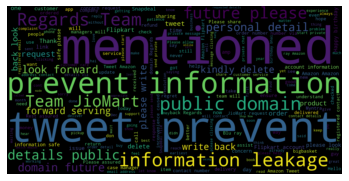

In [93]:
#plotting word cloud 
words = " ".join([twts for twts in df_tweet['Tweet']])
wordcloud = WordCloud(width = 2000,height=1000).generate(words)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Finding the Positive and Negative tweets using textblob


In [98]:
# Create a functin to compute the negative, neutral and positive analysis
def tweet_Analysis(score):
    if score == 0:
        return 'neutral'
    elif score < 0 :
        return 'negative' 
    else:
        return 'Positive'
df_tweet['Analysis'] = df_tweet['Polarity'].apply(tweet_Analysis)

<ipython-input-98-397fbd2019ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Analysis'] = df_tweet['Polarity'].apply(tweet_Analysis)


In [99]:
#show the Data
df_tweet

,COMPANY NAME,Tweet,Subjectivity,Polarity,Analysis
0,JIOMART,"[ 'Rehaan ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral
1,JIOMART,"[ 'You ' , 'informed ' , 'one ' , 'your ' , 't...",0.233333,-0.200000,negative
2,JIOMART,"[ 'Yogesh ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral
3,JIOMART,"[ 'with ' , 'personal ' , 'details ' , 'being ...",0.344444,0.066667,Positive
4,JIOMART,"[ 'understand ' , 'your ' , 'concern ' , 'JioM...",0.400000,0.200000,Positive
...,...,...,...,...,...
30001,SNAPDEAL,"[ 'had ' , 'heard ' , 'many ' , 'times ' , 'th...",0.350000,0.200000,Positive
30002,SNAPDEAL,"[ 'Yes ' , 'noted ' , 'and ' , 'not ' , 'get '...",0.000000,0.000000,neutral
30003,SNAPDEAL,"[ 'This ' , 'really ' , 'worst ' , 'experience...",0.766667,-0.266667,negative
30004,SNAPDEAL,"[ 'Please ' , 'write ' , 'proper ' , 'pronunci...",0.100000,0.000000,neutral


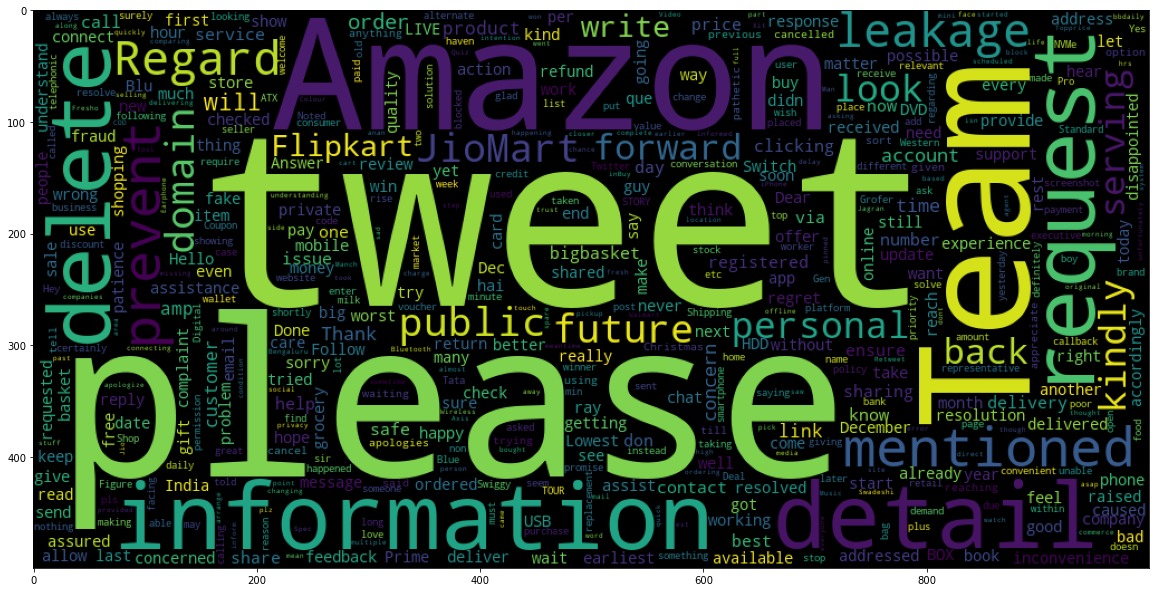

In [132]:
data_neg = df_tweet['Tweet'][:20000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

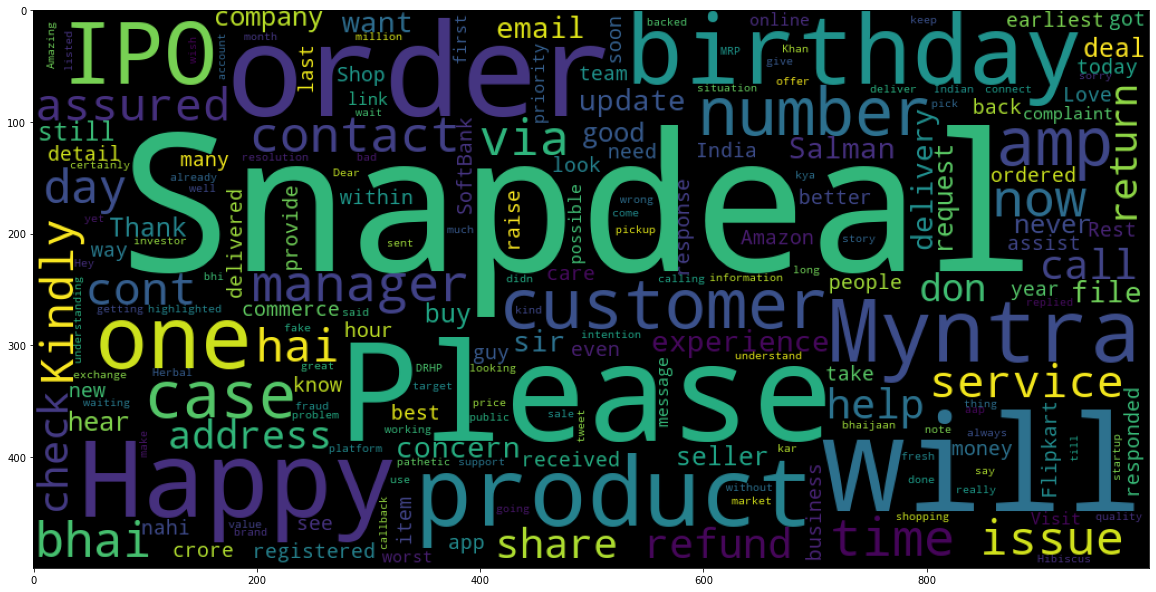

In [131]:
data_pos = df_tweet['Tweet'][20000:]
plt.figure(figsize = (20,20))
wc1 = WordCloud(width = 1000 , height = 500,
              collocations=False).generate(" ".join(data_pos))
plt.imshow(wc1)

# Visualize

In [138]:
# taking subjectivity and polarity in the new dataframe
df_tweet1 = df_tweet.drop(['Subjectivity', 'Polarity'], axis=1)
visualize_words = df_tweet1.groupby('COMPANY NAME')

amazon_group_vizu = visualize_words.get_group('AMAZON-INDIA')
Flipkart_group_vizu = visualize_words.get_group('FLIPKART')
SnapDeal_group_vizu = visualize_words.get_group('SNAPDEAL')
Myntra_group_vizu = visualize_words.get_group('MYNTRA')
BigBasket_group_vizu = visualize_words.get_group('BIGBASKET')
jio_group_vizu = visualize_words.get_group('JIOMART')

<AxesSubplot:xlabel='Analysis'>

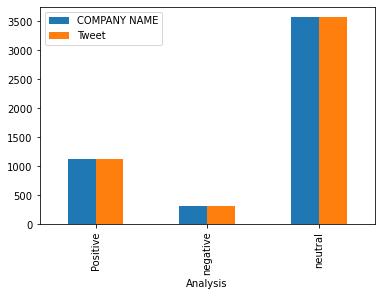

In [142]:
## Amazon Positive and negative tweet ratio
amazon_group_vizu.groupby('Analysis').count().plot(kind='bar')

<AxesSubplot:xlabel='Analysis'>

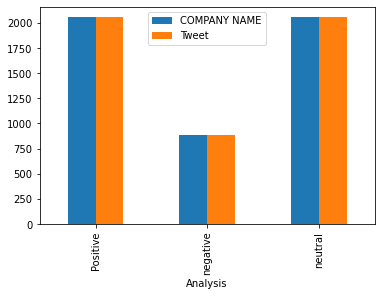

In [143]:
## Flipkart Positive and negative tweet ratio
Flipkart_group_vizu.groupby('Analysis').count().plot(kind='bar')

<AxesSubplot:xlabel='Analysis'>

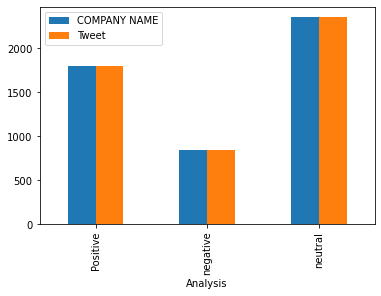

In [144]:
## Snapdeal Positive and negative tweet ratio
SnapDeal_group_vizu.groupby('Analysis').count().plot(kind='bar')

<AxesSubplot:xlabel='Analysis'>

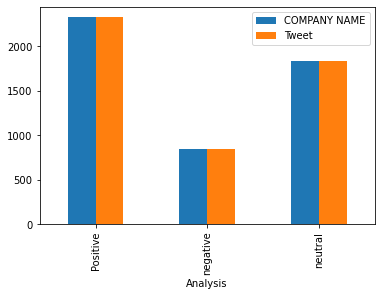

In [145]:
## Myntra Positive and negative tweet ratio
Myntra_group_vizu.groupby('Analysis').count().plot(kind='bar')

<AxesSubplot:xlabel='Analysis'>

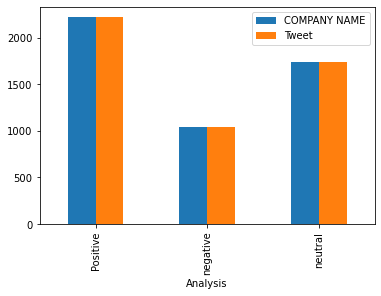

In [146]:
## BigBasket Positive and negative tweet ratio
BigBasket_group_vizu.groupby('Analysis').count().plot(kind='bar')

<AxesSubplot:xlabel='Analysis'>

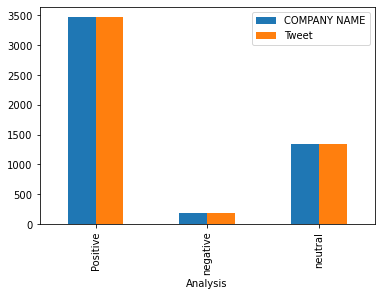

In [147]:
## JioMart Positive and negative tweet ratio
jio_group_vizu.groupby('Analysis').count().plot(kind='bar')

In [140]:
df_company = pd.concat([amazon_group_vizu,Flipkart_group_vizu,SnapDeal_group_vizu,Myntra_group_vizu
                        ,BigBasket_group_vizu,jio_group_vizu], ignore_index=True)

<AxesSubplot:xlabel='Analysis'>

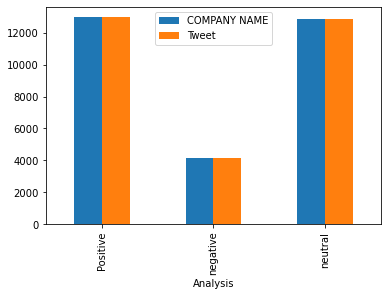

In [141]:
## Company Positive and negative tweet ratio
df_company.groupby('Analysis').count().plot(kind='bar')

In [ ]:
df_tweet.dropna(inplace = True)

In [157]:
df_tweet

,COMPANY NAME,Tweet,Subjectivity,Polarity,Analysis
0,JIOMART,"[ 'Rehaan ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral
1,JIOMART,"[ 'You ' , 'informed ' , 'one ' , 'your ' , 't...",0.233333,-0.200000,negative
2,JIOMART,"[ 'Yogesh ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral
3,JIOMART,"[ 'with ' , 'personal ' , 'details ' , 'being ...",0.344444,0.066667,Positive
4,JIOMART,"[ 'understand ' , 'your ' , 'concern ' , 'JioM...",0.400000,0.200000,Positive
...,...,...,...,...,...
30001,SNAPDEAL,"[ 'had ' , 'heard ' , 'many ' , 'times ' , 'th...",0.350000,0.200000,Positive
30002,SNAPDEAL,"[ 'Yes ' , 'noted ' , 'and ' , 'not ' , 'get '...",0.000000,0.000000,neutral
30003,SNAPDEAL,"[ 'This ' , 'really ' , 'worst ' , 'experience...",0.766667,-0.266667,negative
30004,SNAPDEAL,"[ 'Please ' , 'write ' , 'proper ' , 'pronunci...",0.100000,0.000000,neutral


# MODEL BUILDING

In [158]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

In [161]:
df_tweet['Target'] = label_en.fit_transform(df_tweet['Analysis'])

<ipython-input-161-7b7de4c5a390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Target'] = label_en.fit_transform(df_tweet['Analysis'])


In [165]:
df_tweet

,COMPANY NAME,Tweet,Subjectivity,Polarity,Analysis,Target
0,JIOMART,"[ 'Rehaan ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral,2
1,JIOMART,"[ 'You ' , 'informed ' , 'one ' , 'your ' , 't...",0.233333,-0.200000,negative,1
2,JIOMART,"[ 'Yogesh ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral,2
3,JIOMART,"[ 'with ' , 'personal ' , 'details ' , 'being ...",0.344444,0.066667,Positive,0
4,JIOMART,"[ 'understand ' , 'your ' , 'concern ' , 'JioM...",0.400000,0.200000,Positive,0
...,...,...,...,...,...,...
30001,SNAPDEAL,"[ 'had ' , 'heard ' , 'many ' , 'times ' , 'th...",0.350000,0.200000,Positive,0
30002,SNAPDEAL,"[ 'Yes ' , 'noted ' , 'and ' , 'not ' , 'get '...",0.000000,0.000000,neutral,2
30003,SNAPDEAL,"[ 'This ' , 'really ' , 'worst ' , 'experience...",0.766667,-0.266667,negative,1
30004,SNAPDEAL,"[ 'Please ' , 'write ' , 'proper ' , 'pronunci...",0.100000,0.000000,neutral,2


<AxesSubplot:xlabel='Target'>

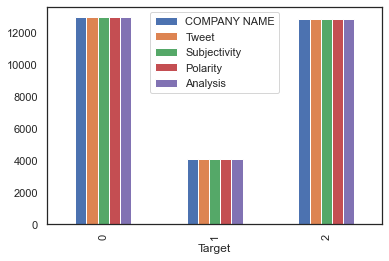

In [166]:
df_tweet.groupby('Target').count().plot(kind='bar')

In [170]:
# converting all the words in the tweets to lower case 
df_tweet['Tweet'] = df_tweet['Tweet'].str.lower()

<ipython-input-170-30dc00748e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Tweet'] = df_tweet['Tweet'].str.lower()


In [172]:
df_tweet

,COMPANY NAME,Tweet,Subjectivity,Polarity,Analysis,Target
0,JIOMART,"[ 'rehaan ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral,2
1,JIOMART,"[ 'you ' , 'informed ' , 'one ' , 'your ' , 't...",0.233333,-0.200000,negative,1
2,JIOMART,"[ 'yogesh ' , 'request ' , 'you ' , 'delete ' ...",0.163889,0.000000,neutral,2
3,JIOMART,"[ 'with ' , 'personal ' , 'details ' , 'being ...",0.344444,0.066667,Positive,0
4,JIOMART,"[ 'understand ' , 'your ' , 'concern ' , 'jiom...",0.400000,0.200000,Positive,0
...,...,...,...,...,...,...
30001,SNAPDEAL,"[ 'had ' , 'heard ' , 'many ' , 'times ' , 'th...",0.350000,0.200000,Positive,0
30002,SNAPDEAL,"[ 'yes ' , 'noted ' , 'and ' , 'not ' , 'get '...",0.000000,0.000000,neutral,2
30003,SNAPDEAL,"[ 'this ' , 'really ' , 'worst ' , 'experience...",0.766667,-0.266667,negative,1
30004,SNAPDEAL,"[ 'please ' , 'write ' , 'proper ' , 'pronunci...",0.100000,0.000000,neutral,2


In [245]:
# seperating X and Y
X = df_tweet.Tweet
Y = df_tweet.Target

In [246]:
# Splitting the data in to training and testing
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 400)

In [247]:
x_train

12959                              [ 'oggi ' , 'amazon ' ]
15963    [ 'bigbasket ' , 'and ' , 'grofers ' , 'its ' ...
13044    [ 'continua ' , 'tweet ' , 'que ' , 'foi ' , '...
21665    [ 'ouch ' , 'sanjeev ' , 'this ' , 'isn ' , 'g...
21632    [ 'the ' , 'reason ' , 'why ' , 'myntra ' , 'a...
                               ...                        
140      [ 'hiren ' , 'request ' , 'you ' , 'delete ' ,...
13241                                        [ 'amazon ' ]
2366     [ 'satish ' , 'request ' , 'you ' , 'kindly ' ...
3535     [ 'sunil ' , 'request ' , 'you ' , 'kindly ' ,...
20828    [ 'just ' , 'tracked ' , 'yesterday ' , 'its '...
Name: Tweet, Length: 24004, dtype: object

In [248]:
x_test

12864                               [ 'non ' , 'amazon ' ]
25328    [ 'sorry ' , 'believe ' , 'this ' , 'not ' , '...
20893    [ 'still ' , 'haven ' , 'received ' , 'any ' ,...
17674    [ 'fried ' , 'gram ' , 'called ' , 'hurigadale...
3219     [ 'anil ' , 'request ' , 'you ' , 'kindly ' , ...
                               ...                        
14341                                        [ 'amazon ' ]
1563     [ 'kshitij ' , 'request ' , 'you ' , 'kindly '...
6409     [ 'trying ' , 'buy ' , 'pro ' , 'stock ' , 'av...
6776     [ 'ensure ' , 'that ' , 'your ' , 'flipkart ' ...
10085    [ 'you ' , 'wear ' , 'makeup ' , 'and ' , 'cle...
Name: Tweet, Length: 6002, dtype: object

# Tf-IDF Vectorizer

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [250]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [251]:
from sklearn.ensemble import RandomForestClassifier
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [253]:
y_predict = randomclassifier.predict(x_test)


In [254]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [255]:
accuracy = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("Accuracy Is: ", accuracy )



[[2409   25  144]
 [ 247  439  139]
 [ 163   16 2420]]
Accuracy Is:  0.8777074308563813


In [256]:
report=classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2578
           1       0.91      0.53      0.67       825
           2       0.90      0.93      0.91      2599

    accuracy                           0.88      6002
   macro avg       0.89      0.80      0.83      6002
weighted avg       0.88      0.88      0.87      6002



In [257]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [258]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0)
model.fit(x_train, y_train)
y_prediction1 = model.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [259]:
accuracy = accuracy_score(y_test, y_prediction1)
cm = confusion_matrix(y_test, y_prediction1)
print(cm)
print("Accuracy Is: ", accuracy )


[[2362   54  162]
 [  88  586  151]
 [  28   10 2561]]
Accuracy Is:  0.9178607130956348


In [260]:
report=classification_report(y_test,y_prediction1)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2578
           1       0.90      0.71      0.79       825
           2       0.89      0.99      0.94      2599

    accuracy                           0.92      6002
   macro avg       0.92      0.87      0.89      6002
weighted avg       0.92      0.92      0.92      6002

